In [15]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [17]:
#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f42df33d7e018d605ccf2fbc49fe29e9


In [18]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=13000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=13000)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [19]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [20]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [21]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

2653

In [22]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [23]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | acapulco
Processing Record 4 of Set 1 | victoria
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | narsaq
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | sept-iles
Processing Record 10 of Set 1 | pangnirtung
Processing Record 11 of Set 1 | vestmannaeyjar
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | chuy
Processing Record 14 of Set 1 | puerto ayacucho
Processing Record 15 of Set 1 | chokurdakh
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | saldanha
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | inirida
Processing Record 22 of Set 1 | svetlaya
Processing Record 2

Processing Record 37 of Set 4 | touros
Processing Record 38 of Set 4 | palmer
Processing Record 39 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 40 of Set 4 | sinnamary
Processing Record 41 of Set 4 | nishihara
Processing Record 42 of Set 4 | norman wells
Processing Record 43 of Set 4 | ilulissat
Processing Record 44 of Set 4 | hasaki
Processing Record 45 of Set 4 | sao joao da barra
Processing Record 46 of Set 4 | fairbanks
Processing Record 47 of Set 4 | sawakin
Processing Record 48 of Set 4 | college
Processing Record 49 of Set 4 | antofagasta
Processing Record 50 of Set 4 | nemuro
Processing Record 1 of Set 5 | carnarvon
Processing Record 2 of Set 5 | fortuna
Processing Record 3 of Set 5 | east london
Processing Record 4 of Set 5 | istanbul
Processing Record 5 of Set 5 | pisco
Processing Record 6 of Set 5 | ostrovnoy
Processing Record 7 of Set 5 | broome
Processing Record 8 of Set 5 | moranbah
Processing Record 9 of Set 5 | la union
Processing Record 10 of Set 5 | dingle
P

Processing Record 24 of Set 8 | hattiesburg
Processing Record 25 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 26 of Set 8 | mahina
Processing Record 27 of Set 8 | vila
Processing Record 28 of Set 8 | mavrovi anovi
Processing Record 29 of Set 8 | tuatapere
Processing Record 30 of Set 8 | bonfim
Processing Record 31 of Set 8 | lakatoro
Processing Record 32 of Set 8 | ibirapitanga
Processing Record 33 of Set 8 | hengshui
Processing Record 34 of Set 8 | formosa
Processing Record 35 of Set 8 | korla
Processing Record 36 of Set 8 | geraldton
Processing Record 37 of Set 8 | mantua
Processing Record 38 of Set 8 | hofn
Processing Record 39 of Set 8 | sembakung
Processing Record 40 of Set 8 | mugur-aksy
Processing Record 41 of Set 8 | maharajganj
Processing Record 42 of Set 8 | songjianghe
Processing Record 43 of Set 8 | lipari
Processing Record 44 of Set 8 | bardiyah
Processing Record 45 of Set 8 | nhulunbuy
Processing Record 46 of Set 8 | tumannyy
City not found. Skipping..

Processing Record 13 of Set 12 | kysyl-syr
Processing Record 14 of Set 12 | bengkulu
Processing Record 15 of Set 12 | pemangkat
Processing Record 16 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 17 of Set 12 | elko
Processing Record 18 of Set 12 | chicama
Processing Record 19 of Set 12 | cap-aux-meules
Processing Record 20 of Set 12 | saleaula
City not found. Skipping...
Processing Record 21 of Set 12 | sirsa
Processing Record 22 of Set 12 | bac lieu
Processing Record 23 of Set 12 | kendari
Processing Record 24 of Set 12 | hare bay
Processing Record 25 of Set 12 | jinchengjiang
City not found. Skipping...
Processing Record 26 of Set 12 | strezhevoy
Processing Record 27 of Set 12 | riberalta
Processing Record 28 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 29 of Set 12 | kungurtug
Processing Record 30 of Set 12 | doka
Processing Record 31 of Set 12 | kajaani
Processing Record 32 of Set 12 | kristiansund
Processing Record 33 of Set 12 | nov

Processing Record 46 of Set 15 | baijiantan
Processing Record 47 of Set 15 | hami
Processing Record 48 of Set 15 | grand river south east
City not found. Skipping...
Processing Record 49 of Set 15 | skowhegan
Processing Record 50 of Set 15 | pimenta bueno
Processing Record 1 of Set 16 | bushehr
Processing Record 2 of Set 16 | kudahuvadhoo
Processing Record 3 of Set 16 | kloulklubed
Processing Record 4 of Set 16 | puqi
Processing Record 5 of Set 16 | sistranda
Processing Record 6 of Set 16 | bhanpuri
Processing Record 7 of Set 16 | karaul
City not found. Skipping...
Processing Record 8 of Set 16 | angoram
Processing Record 9 of Set 16 | oktyabrskoye
Processing Record 10 of Set 16 | shetpe
Processing Record 11 of Set 16 | huaihua
Processing Record 12 of Set 16 | pantai remis
Processing Record 13 of Set 16 | eucaliptus
Processing Record 14 of Set 16 | vicksburg
Processing Record 15 of Set 16 | okhotsk
Processing Record 16 of Set 16 | erenhot
Processing Record 17 of Set 16 | san pedro
Proc

City not found. Skipping...
Processing Record 32 of Set 19 | belyy yar
Processing Record 33 of Set 19 | talawdi
City not found. Skipping...
Processing Record 34 of Set 19 | sarh
Processing Record 35 of Set 19 | ahuimanu
Processing Record 36 of Set 19 | sechura
Processing Record 37 of Set 19 | roma
Processing Record 38 of Set 19 | kupang
Processing Record 39 of Set 19 | luchow
Processing Record 40 of Set 19 | harper
Processing Record 41 of Set 19 | shaunavon
Processing Record 42 of Set 19 | meulaboh
Processing Record 43 of Set 19 | bubaque
Processing Record 44 of Set 19 | sawtell
Processing Record 45 of Set 19 | illapel
Processing Record 46 of Set 19 | pajan
Processing Record 47 of Set 19 | leningradskiy
Processing Record 48 of Set 19 | imeni poliny osipenko
Processing Record 49 of Set 19 | himora
City not found. Skipping...
Processing Record 50 of Set 19 | ponca city
Processing Record 1 of Set 20 | chegdomyn
Processing Record 2 of Set 20 | rungata
City not found. Skipping...
Processing

Processing Record 18 of Set 23 | baley
Processing Record 19 of Set 23 | luang prabang
Processing Record 20 of Set 23 | noumea
Processing Record 21 of Set 23 | hommersak
Processing Record 22 of Set 23 | bahia honda
Processing Record 23 of Set 23 | charcas
Processing Record 24 of Set 23 | tezu
Processing Record 25 of Set 23 | toora-khem
Processing Record 26 of Set 23 | barcelos
Processing Record 27 of Set 23 | akdepe
Processing Record 28 of Set 23 | voyvozh
Processing Record 29 of Set 23 | falealupo
City not found. Skipping...
Processing Record 30 of Set 23 | winchester
Processing Record 31 of Set 23 | witney
Processing Record 32 of Set 23 | libreville
Processing Record 33 of Set 23 | novopavlovka
Processing Record 34 of Set 23 | linjiang
Processing Record 35 of Set 23 | tutoia
Processing Record 36 of Set 23 | malwan
City not found. Skipping...
Processing Record 37 of Set 23 | shelburne
Processing Record 38 of Set 23 | kihei
Processing Record 39 of Set 23 | hearst
Processing Record 40 of

Processing Record 10 of Set 27 | turukhansk
Processing Record 11 of Set 27 | zheleznodorozhnyy
Processing Record 12 of Set 27 | grand falls
Processing Record 13 of Set 27 | pordim
Processing Record 14 of Set 27 | qobustan
Processing Record 15 of Set 27 | juye
Processing Record 16 of Set 27 | bargal
City not found. Skipping...
Processing Record 17 of Set 27 | ballina
Processing Record 18 of Set 27 | neftegorsk
Processing Record 19 of Set 27 | moses lake
Processing Record 20 of Set 27 | nguiu
City not found. Skipping...
Processing Record 21 of Set 27 | biltine
Processing Record 22 of Set 27 | fomboni
Processing Record 23 of Set 27 | chatellerault
Processing Record 24 of Set 27 | sinazongwe
Processing Record 25 of Set 27 | talah
City not found. Skipping...
Processing Record 26 of Set 27 | golden
Processing Record 27 of Set 27 | birjand
Processing Record 28 of Set 27 | hervey bay
Processing Record 29 of Set 27 | sohag
Processing Record 30 of Set 27 | ngunguru
Processing Record 31 of Set 27

Processing Record 46 of Set 30 | omsukchan
Processing Record 47 of Set 30 | kiama
Processing Record 48 of Set 30 | trincomalee
Processing Record 49 of Set 30 | kenai
Processing Record 50 of Set 30 | novyy urengoy
Processing Record 1 of Set 31 | saryshagan
City not found. Skipping...
Processing Record 2 of Set 31 | chumikan
Processing Record 3 of Set 31 | lesnoy
Processing Record 4 of Set 31 | catuday
Processing Record 5 of Set 31 | malpe
Processing Record 6 of Set 31 | yemelyanovo
Processing Record 7 of Set 31 | ebeltoft
Processing Record 8 of Set 31 | north little rock
Processing Record 9 of Set 31 | gorontalo
Processing Record 10 of Set 31 | benjamin constant
Processing Record 11 of Set 31 | kroya
Processing Record 12 of Set 31 | milverton
Processing Record 13 of Set 31 | januaria
Processing Record 14 of Set 31 | boshnyakovo
Processing Record 15 of Set 31 | darovskoy
Processing Record 16 of Set 31 | cabanas
Processing Record 17 of Set 31 | borogontsy
Processing Record 18 of Set 31 | 

Processing Record 36 of Set 34 | champerico
Processing Record 37 of Set 34 | balvi
Processing Record 38 of Set 34 | marica
Processing Record 39 of Set 34 | emerald
Processing Record 40 of Set 34 | conde
Processing Record 41 of Set 34 | roches noires
City not found. Skipping...
Processing Record 42 of Set 34 | muroto
Processing Record 43 of Set 34 | aljezur
Processing Record 44 of Set 34 | banatsko novo selo
Processing Record 45 of Set 34 | paracuru
Processing Record 46 of Set 34 | varhaug
Processing Record 47 of Set 34 | san policarpo
Processing Record 48 of Set 34 | suoyarvi
Processing Record 49 of Set 34 | dharchula
Processing Record 50 of Set 34 | ekibastuz
Processing Record 1 of Set 35 | villazon
Processing Record 2 of Set 35 | chauk
Processing Record 3 of Set 35 | labe
Processing Record 4 of Set 35 | odienne
Processing Record 5 of Set 35 | zurrieq
Processing Record 6 of Set 35 | leh
Processing Record 7 of Set 35 | isabela
Processing Record 8 of Set 35 | viligili
City not found. Sk

Processing Record 24 of Set 38 | hobe sound
Processing Record 25 of Set 38 | molina
Processing Record 26 of Set 38 | lubu
Processing Record 27 of Set 38 | tsumeb
Processing Record 28 of Set 38 | tahe
Processing Record 29 of Set 38 | chambersburg
Processing Record 30 of Set 38 | kilindoni
Processing Record 31 of Set 38 | mombetsu
Processing Record 32 of Set 38 | guatire
Processing Record 33 of Set 38 | terra santa
Processing Record 34 of Set 38 | konongo
Processing Record 35 of Set 38 | storslett
Processing Record 36 of Set 38 | namie
Processing Record 37 of Set 38 | baghdad
Processing Record 38 of Set 38 | opuwo
Processing Record 39 of Set 38 | panama city
Processing Record 40 of Set 38 | magomeni
Processing Record 41 of Set 38 | agadez
Processing Record 42 of Set 38 | macaboboni
City not found. Skipping...
Processing Record 43 of Set 38 | tsuruoka
Processing Record 44 of Set 38 | taloqan
Processing Record 45 of Set 38 | pangkalanbuun
Processing Record 46 of Set 38 | cockburn harbour
C

Processing Record 13 of Set 42 | tommot
Processing Record 14 of Set 42 | mangai
Processing Record 15 of Set 42 | kothapet
Processing Record 16 of Set 42 | gorno-chuyskiy
City not found. Skipping...
Processing Record 17 of Set 42 | wellington
Processing Record 18 of Set 42 | ubaitaba
Processing Record 19 of Set 42 | neyshabur
Processing Record 20 of Set 42 | kimberley
Processing Record 21 of Set 42 | nueva loja
Processing Record 22 of Set 42 | dori
Processing Record 23 of Set 42 | veraval
Processing Record 24 of Set 42 | doctor pedro p. pena
City not found. Skipping...
Processing Record 25 of Set 42 | bani walid
Processing Record 26 of Set 42 | uniontown
Processing Record 27 of Set 42 | south lake tahoe
Processing Record 28 of Set 42 | celestun
Processing Record 29 of Set 42 | kadykchan
City not found. Skipping...
Processing Record 30 of Set 42 | wangaratta
Processing Record 31 of Set 42 | chirongui
Processing Record 32 of Set 42 | terrace
Processing Record 33 of Set 42 | safakulevo
Pro

Processing Record 48 of Set 45 | kasongo-lunda
Processing Record 49 of Set 45 | nigde
Processing Record 50 of Set 45 | stoyba
City not found. Skipping...
Processing Record 1 of Set 46 | iskele
City not found. Skipping...
Processing Record 2 of Set 46 | marystown
Processing Record 3 of Set 46 | tandalti
Processing Record 4 of Set 46 | salinopolis
Processing Record 5 of Set 46 | turka
Processing Record 6 of Set 46 | sinegorye
Processing Record 7 of Set 46 | healdsburg
Processing Record 8 of Set 46 | glazov
Processing Record 9 of Set 46 | izhmorskiy
Processing Record 10 of Set 46 | skovorodino
Processing Record 11 of Set 46 | mazara del vallo
Processing Record 12 of Set 46 | ailigandi
Processing Record 13 of Set 46 | krasnovishersk
Processing Record 14 of Set 46 | bangangte
Processing Record 15 of Set 46 | zhanaozen
Processing Record 16 of Set 46 | kalengwa
Processing Record 17 of Set 46 | ostrovskoye
Processing Record 18 of Set 46 | san vicente
Processing Record 19 of Set 46 | ecoporanga

Processing Record 30 of Set 49 | ye
City not found. Skipping...
Processing Record 31 of Set 49 | mushie
Processing Record 32 of Set 49 | zanjan
Processing Record 33 of Set 49 | ambam
Processing Record 34 of Set 49 | ocna de fier
Processing Record 35 of Set 49 | novo aripuana
Processing Record 36 of Set 49 | duluth
Processing Record 37 of Set 49 | daund
Processing Record 38 of Set 49 | afgoye
City not found. Skipping...
Processing Record 39 of Set 49 | xinmin
Processing Record 40 of Set 49 | mayumba
Processing Record 41 of Set 49 | liku
Processing Record 42 of Set 49 | hoopstad
Processing Record 43 of Set 49 | kroonstad
Processing Record 44 of Set 49 | ca mau
Processing Record 45 of Set 49 | lakselv
Processing Record 46 of Set 49 | aketi
Processing Record 47 of Set 49 | rampur
Processing Record 48 of Set 49 | brezno
Processing Record 49 of Set 49 | escanaba
Processing Record 50 of Set 49 | yefimovskiy
City not found. Skipping...
Processing Record 1 of Set 50 | oak ridge
Processing Recor

Processing Record 16 of Set 53 | vila praia de ancora
Processing Record 17 of Set 53 | bayburt
Processing Record 18 of Set 53 | lae
Processing Record 19 of Set 53 | qafsah
City not found. Skipping...
Processing Record 20 of Set 53 | rosarito
Processing Record 21 of Set 53 | batsfjord
Processing Record 22 of Set 53 | chikoy
City not found. Skipping...
Processing Record 23 of Set 53 | barwani
Processing Record 24 of Set 53 | uthal
Processing Record 25 of Set 53 | ozinki
Processing Record 26 of Set 53 | tsiroanomandidy
Processing Record 27 of Set 53 | luganville
Processing Record 28 of Set 53 | vila do maio
Processing Record 29 of Set 53 | middelburg
Processing Record 30 of Set 53 | quthing
Processing Record 31 of Set 53 | bulaevo
Processing Record 32 of Set 53 | plesetsk
Processing Record 33 of Set 53 | linxia
Processing Record 34 of Set 53 | vikhorevka
Processing Record 35 of Set 53 | dudinka
Processing Record 36 of Set 53 | panguna
Processing Record 37 of Set 53 | juripiranga
Processin

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,79.11,61,33,5.03,PF,2020-02-21 23:46:38
1,Acapulco,16.86,-99.89,84.20,74,20,10.29,MX,2020-02-21 23:43:53
2,Victoria,22.29,114.16,66.00,82,0,2.24,HK,2020-02-21 23:45:11
3,Bredasdorp,-34.53,20.04,68.00,82,19,3.36,ZA,2020-02-21 23:46:39
4,Lebu,-37.62,-73.65,57.56,85,0,2.39,CL,2020-02-21 23:46:39
5,Narsaq,60.92,-46.05,21.20,67,60,2.24,GL,2020-02-21 23:46:39
6,Hilo,19.73,-155.09,75.00,83,90,8.05,US,2020-02-21 23:46:39
7,Sept-Iles,50.20,-66.38,17.60,67,75,14.99,CA,2020-02-21 23:43:03
8,Pangnirtung,66.15,-65.71,-34.60,65,20,4.70,CA,2020-02-21 23:41:44
9,Vestmannaeyjar,63.44,-20.27,34.16,74,100,12.82,IS,2020-02-21 23:46:40


In [25]:
new_column_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df=city_data_df[new_column_order]
city_data_df.head(15)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-02-21 23:46:38,-23.12,-134.97,79.11,61,33,5.03
1,Acapulco,MX,2020-02-21 23:43:53,16.86,-99.89,84.20,74,20,10.29
2,Victoria,HK,2020-02-21 23:45:11,22.29,114.16,66.00,82,0,2.24
3,Bredasdorp,ZA,2020-02-21 23:46:39,-34.53,20.04,68.00,82,19,3.36
4,Lebu,CL,2020-02-21 23:46:39,-37.62,-73.65,57.56,85,0,2.39
5,Narsaq,GL,2020-02-21 23:46:39,60.92,-46.05,21.20,67,60,2.24
6,Hilo,US,2020-02-21 23:46:39,19.73,-155.09,75.00,83,90,8.05
7,Sept-Iles,CA,2020-02-21 23:43:03,50.20,-66.38,17.60,67,75,14.99
8,Pangnirtung,CA,2020-02-21 23:41:44,66.15,-65.71,-34.60,65,20,4.70
9,Vestmannaeyjar,IS,2020-02-21 23:46:40,63.44,-20.27,34.16,74,100,12.82


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [39]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1582337850.834453

In [40]:
#Convert to string format method (readable)
today = time.strftime("%x")
today

'02/21/20'

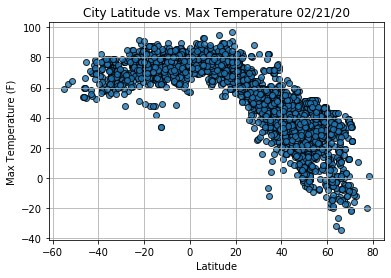

In [41]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

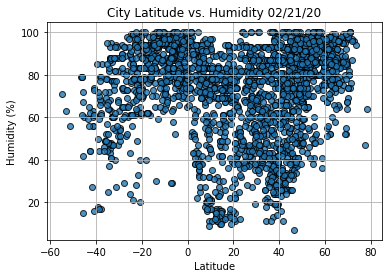

In [42]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

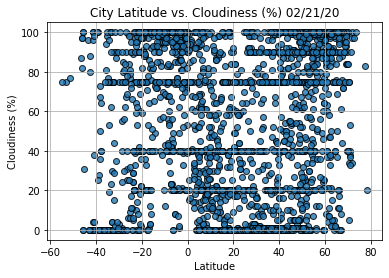

In [43]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

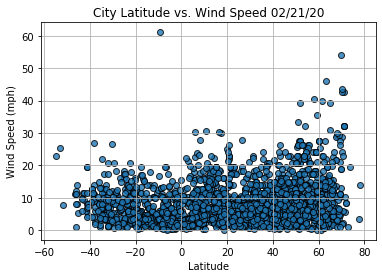

In [44]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [45]:
#Import linear regression
from scipy.stats import linregress

In [63]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [64]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=1.1231491479055298, intercept=82.9621516541371, rvalue=0.3744071568991133, pvalue=1.9771155728070335e-22, stderr=0.11091021757423972)

In [65]:
index13=city_data_df.loc[13]
index13

City                   Chokurdakh
Country                        RU
Date          2020-02-21 23:46:40
Lat                         70.63
Lng                        147.92
Max Temp                   -21.24
Humidity                       97
Cloudiness                     34
Wind Speed                   2.21
Name: 13, dtype: object

In [66]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Acapulco,MX,2020-02-21 23:43:53,16.86,-99.89,84.20,74,20,10.29
2,Victoria,HK,2020-02-21 23:45:11,22.29,114.16,66.00,82,0,2.24
5,Narsaq,GL,2020-02-21 23:46:39,60.92,-46.05,21.20,67,60,2.24
6,Hilo,US,2020-02-21 23:46:39,19.73,-155.09,75.00,83,90,8.05
7,Sept-Iles,CA,2020-02-21 23:43:03,50.20,-66.38,17.60,67,75,14.99
...,...,...,...,...,...,...,...,...,...
2443,Adrasmon,TJ,2020-02-21 23:54:44,40.65,69.99,44.60,81,94,8.95
2444,Kenora,CA,2020-02-21 23:54:44,49.82,-94.43,37.40,44,20,10.29
2445,Maiduguri,NG,2020-02-21 23:54:45,11.85,13.16,71.85,25,0,10.76
2448,Orange Cove,US,2020-02-21 23:54:45,36.62,-119.31,72.00,30,1,6.17


In [67]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Acapulco,MX,2020-02-21 23:43:53,16.86,-99.89,84.2,74,20,10.29
2,Victoria,HK,2020-02-21 23:45:11,22.29,114.16,66.0,82,0,2.24
5,Narsaq,GL,2020-02-21 23:46:39,60.92,-46.05,21.2,67,60,2.24
6,Hilo,US,2020-02-21 23:46:39,19.73,-155.09,75.0,83,90,8.05
7,Sept-Iles,CA,2020-02-21 23:43:03,50.20,-66.38,17.6,67,75,14.99


In [68]:
# Create Northern and Southern Hemisphere DataFrames.
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-02-21 23:46:38,-23.12,-134.97,79.11,61,33,5.03
3,Bredasdorp,ZA,2020-02-21 23:46:39,-34.53,20.04,68.00,82,19,3.36
4,Lebu,CL,2020-02-21 23:46:39,-37.62,-73.65,57.56,85,0,2.39
10,Avarua,CK,2020-02-21 23:42:03,-21.21,-159.78,84.20,83,42,9.17
11,Chuy,UY,2020-02-21 23:46:40,-33.70,-53.46,59.61,63,62,12.39


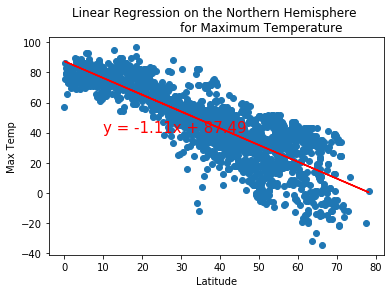

In [101]:
# Linear regression on the Northern Hemisphere for Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                       for Maximum Temperature', 'Max Temp',(10,40))

In [102]:
linregress(x_values, y_values)

LinregressResult(slope=-1.114287976268993, intercept=87.49466716152494, rvalue=-0.841363620010165, pvalue=0.0, stderr=0.016792193336780864)

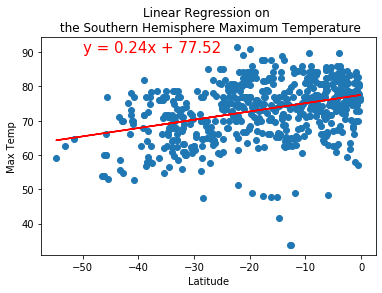

In [103]:
# Linear regression on the Southern Hemisphere for Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on \n the Southern Hemisphere Maximum Temperature",
                       "Max Temp",(-50,90))

In [104]:
linregress(x_values, y_values)

LinregressResult(slope=0.24165616841920112, intercept=77.52247849258532, rvalue=0.3488928548691695, pvalue=1.6847156308115685e-19, stderr=0.02588185768294903)

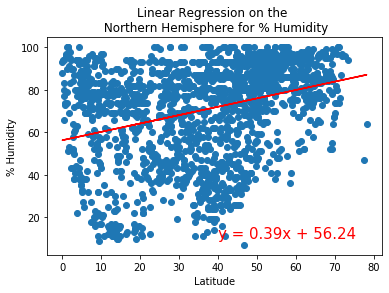

In [105]:
# Linear regression on the Northern Hemisphere for % Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the \n Northern Hemisphere for % Humidity', '% Humidity',(40,10))

In [106]:
linregress(x_values, y_values)

LinregressResult(slope=0.39402694692917817, intercept=56.23605090918974, rvalue=0.32152933224606667, pvalue=5.0956303083624e-45, stderr=0.027222737987595842)

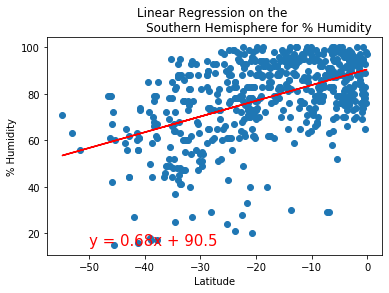

In [83]:
# Linear regression on the Southern Hemisphere for % Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the \n\
                       Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

In [56]:
linregress(x_values, y_values)

LinregressResult(slope=0.6762836854327621, intercept=90.50161890987073, rvalue=0.4911909655472787, pvalue=1.2495512188946255e-39, stderr=0.04781864400770463)

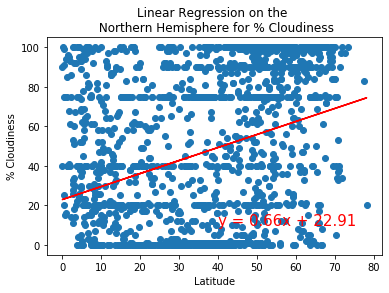

In [93]:
# Linear regression on the Northern Hemisphere for Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the \n Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

In [94]:
linregress(x_values, y_values)

LinregressResult(slope=0.6585707404546783, intercept=22.909515402133113, rvalue=0.3144453168110204, pvalue=4.9469839550588846e-43, stderr=0.04664146141330988)

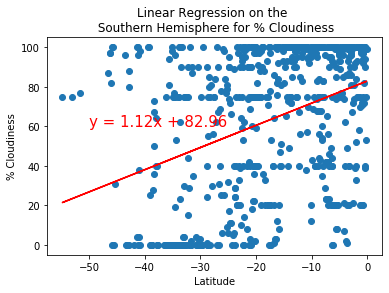

In [95]:
# Linear regression on the Southern Hemisphere for Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the \n Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

In [96]:
linregress(x_values, y_values)

LinregressResult(slope=1.1231491479055298, intercept=82.9621516541371, rvalue=0.3744071568991133, pvalue=1.9771155728070335e-22, stderr=0.11091021757423972)

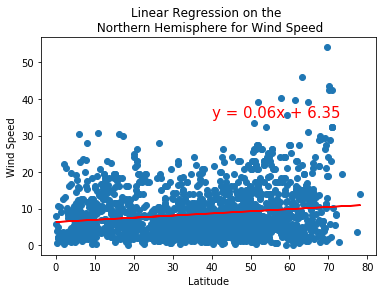

In [97]:
# Linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the \n Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

In [98]:
linregress(x_values, y_values)

LinregressResult(slope=0.05864598419733074, intercept=6.349155686205933, rvalue=0.16299227451696277, pvalue=2.6789178696665745e-12, stderr=0.008328119404592287)

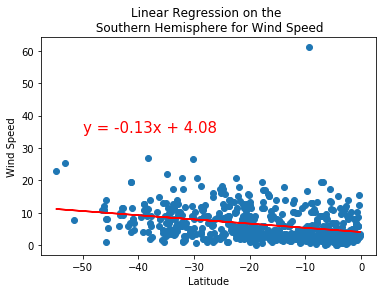

In [99]:
# Linear regression on the Southern Hemisphere for Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the \n Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))

In [100]:
linregress(x_values, y_values)

LinregressResult(slope=-0.12950253218085261, intercept=4.075260065914007, rvalue=-0.3037803932902378, pvalue=6.149655542926164e-15, stderr=0.01619453733943541)